In [1]:
import wavNN.training.plot_results as plots
from wavNN.training.training_metrics import TrainingMetrics

import matplotlib.pyplot as plt
import json 
import pandas as pd 
import numpy as np
import os

In [2]:
results_path = "../results/naive_params/"
extra_metrics = [TrainingMetrics.accuracy,
                TrainingMetrics.auc_roc,
                TrainingMetrics.f1,]

In [3]:
def _find_experiment(network, dataset): 
    all_experiments = os.listdir(results_path)
    exp_dir = [exp for exp in all_experiments if (network in exp) and (dataset in exp)][0]
    return exp_dir

def read_history_json(network, dataset): 
    experiment = _find_experiment(network, dataset)
    history_path = f"{results_path}{experiment}/history.json"
    with open(history_path, 'r') as path: 
        history = json.load(path)
    runs = []
    for key in history.keys(): 
        hist = pd.DataFrame(history[key]).astype(float)
        runs.append(hist)
    return runs


def read_param_json(network, dataset):
    experiment = _find_experiment(network, dataset)
    history_path = f"{results_path}{experiment}/parameter_history.json"
    with open(history_path, 'r') as path: 
        history = json.load(path)
    num_params = history['num_parameters']
    inference_time = history['inference_timing']
    training_time = history['training_timing']

    return num_params, inference_time, training_time

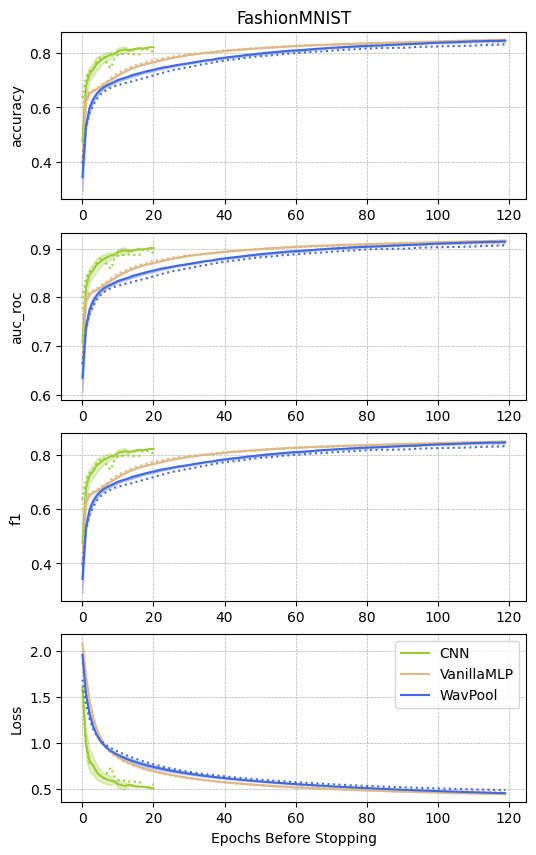

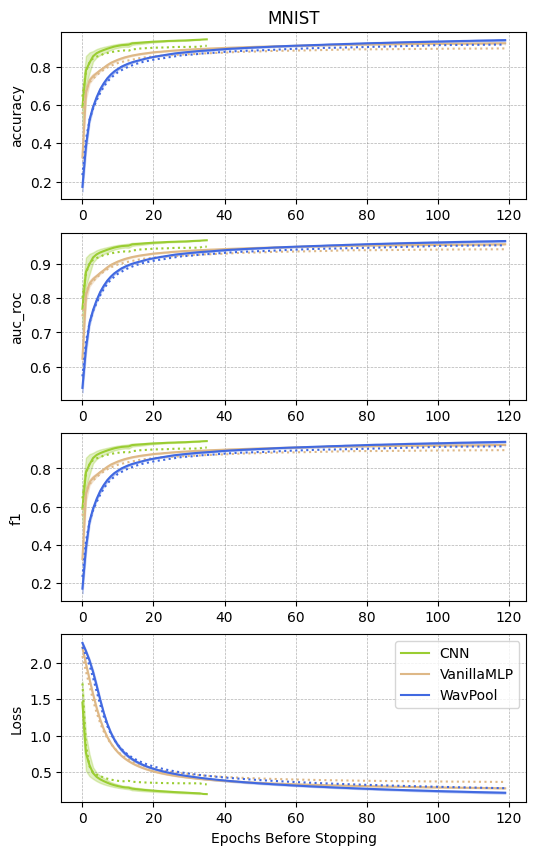

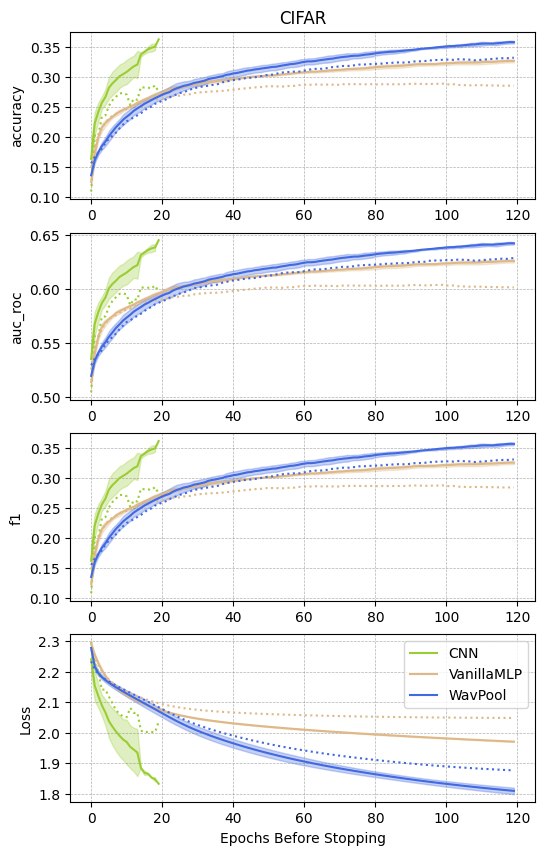

In [29]:
models = ["CNN", "VanillaMLP", "WavPool"]
colorway = ["yellowgreen", 'burlywood', "royalblue"]
markers = ["o", 's', '^']
datasets = ["FashionMNIST", "_MNIST", "CIFAR"]


for dataset in datasets: 
    n_subplots = len(extra_metrics) + 1
    fig, subplots = plt.subplots(nrows=n_subplots, ncols=1, figsize=(6, 2.5*n_subplots))

    for model, color, marker in zip(models, colorway, markers): 
        histories = read_history_json(model, dataset)
        label = model

        for metric_index, metrics in enumerate(extra_metrics):

            training = [history[f"train_{metrics.__name__}"] for history in histories]
            val = [history[f"val_{metrics.__name__}"] for history in histories]

            mean_training = pd.DataFrame(training).mean(axis=0)
            std_training = pd.DataFrame(training).std(axis=0)

            epochs = range(len(mean_training))

            mean_val = pd.DataFrame(val).mean(axis=0)

            subplots[metric_index].grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha=.6)

            subplots[metric_index].plot(epochs, mean_training, label=label, color=color)
            subplots[metric_index].fill_between(epochs,mean_training-std_training, mean_training+std_training ,alpha=0.3, color=color)
            subplots[metric_index].plot(epochs, mean_val, linestyle='dotted', color=color)
            subplots[metric_index].set_ylabel(metrics.__name__)


        training = [history[f"train_loss"] for history in histories]
        val = [history[f"val_loss"] for history in histories]

        mean_training = pd.DataFrame(training).mean(axis=0)
        std_training = pd.DataFrame(training).std(axis=0)
        mean_val = pd.DataFrame(val).mean(axis=0)

        epochs = range(len(mean_training))

        metric_index = -1

        subplots[metric_index].plot(epochs, mean_training, label=label, color=color)
        subplots[metric_index].fill_between(epochs,mean_training-std_training, mean_training+std_training ,alpha=0.3, color=color)
        subplots[metric_index].plot(epochs, mean_val, linestyle="dotted", color=color)
        subplots[metric_index].set_ylabel("Loss")
        subplots[metric_index].grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha=.6)

        subplots[0].set_title(dataset.strip("_"))
    plt.xlabel("Epochs Before Stopping")
    plt.legend()
    plt.show()



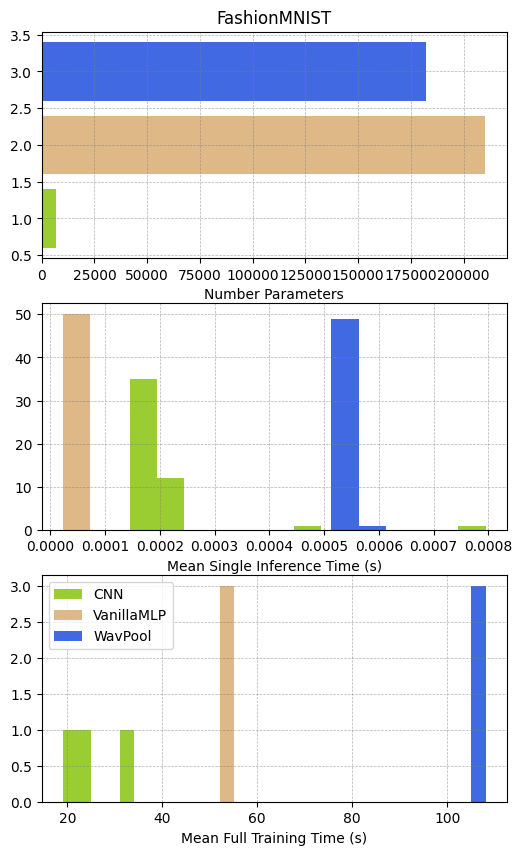

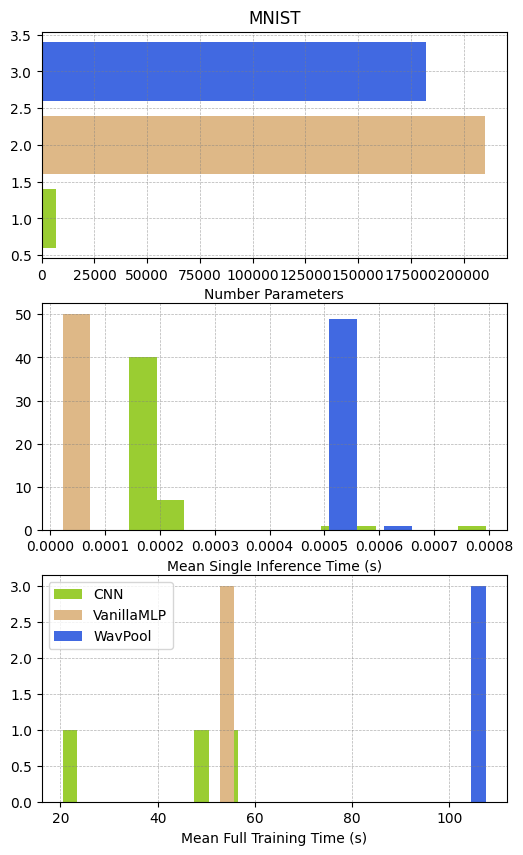

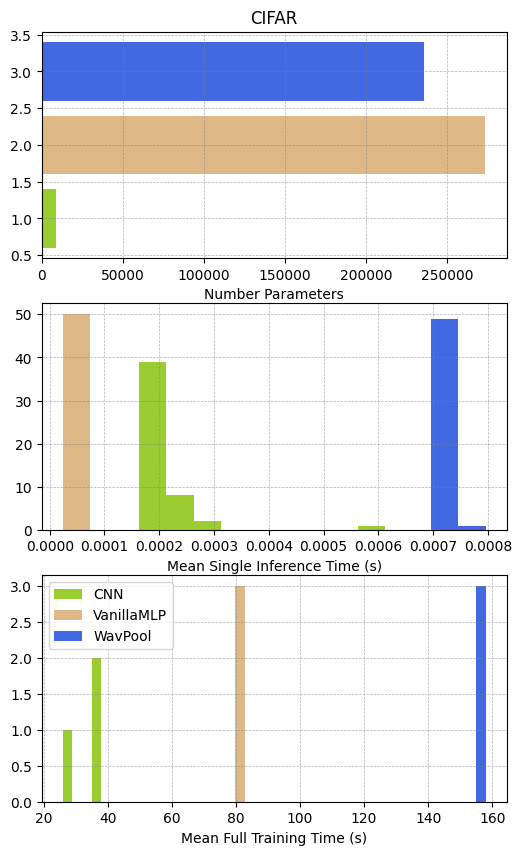

In [55]:
for dataset in datasets: 
    num_params = []
    inference_time = []
    training_time = []
    for i, model in enumerate(models): 
        params, inference, train = read_param_json(model, dataset)

        num_params.append(params)
        inference_time.append(inference)
        training_time.append(train)
    
    fig, subplots = plt.subplots(nrows=3, ncols=1, figsize=(6,10))

    bar_x = [i+1 for i in range(len(num_params))]
    widths = [.75 for _ in range(len(num_params))]

    subplots[0].barh(y=bar_x, width=num_params, color=colorway)
    subplots[0].set_xlabel("Number Parameters")
    subplots[0].grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha=.6)

    for model, color, inference, training in zip(models, colorway, inference_time, training_time):
        w = .00005
        subplots[1].hist(
            inference, 
            bins=np.arange(min(inference), max(inference)+w, w), 
            label=model, color=color)
        subplots[1].set_xlabel("Mean Single Inference Time (s)")
        subplots[1].grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha=.6)

        w = 3.0
        subplots[2].hist(
            training, 
            bins=np.arange(min(training), max(training)+w, w), 
            label=model, color=color)

        subplots[2].set_xlabel("Mean Full Training Time (s)")
        subplots[2].grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha=.6)

    subplots[0].set_title(dataset.strip('_'))
    plt.legend()
    plt.show()

In [56]:
results_path = "../results/optimize_params/"

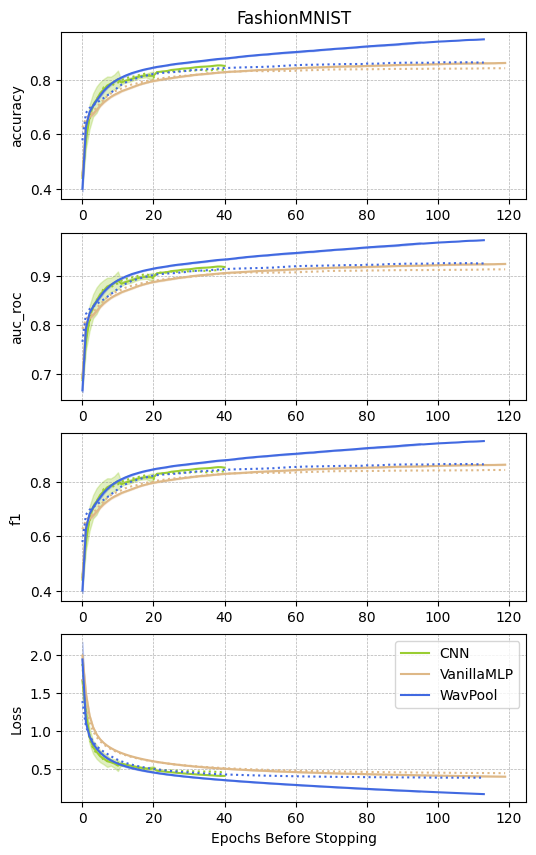

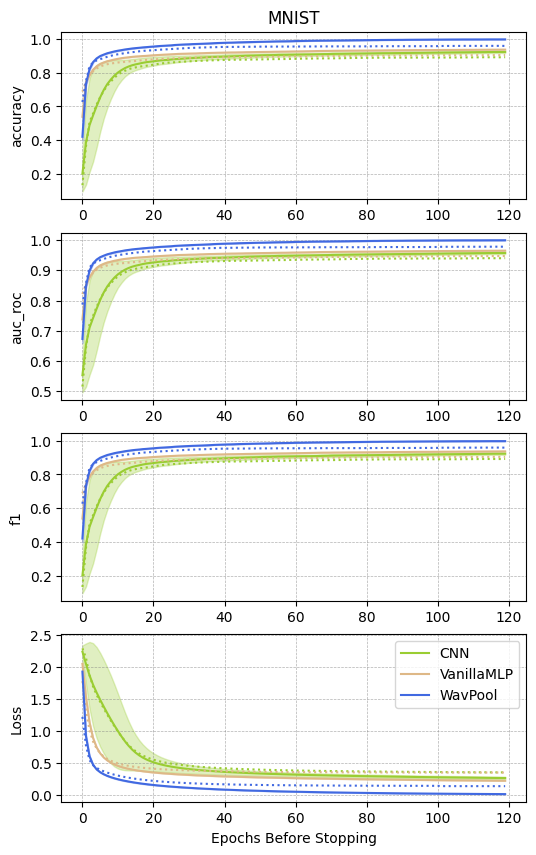

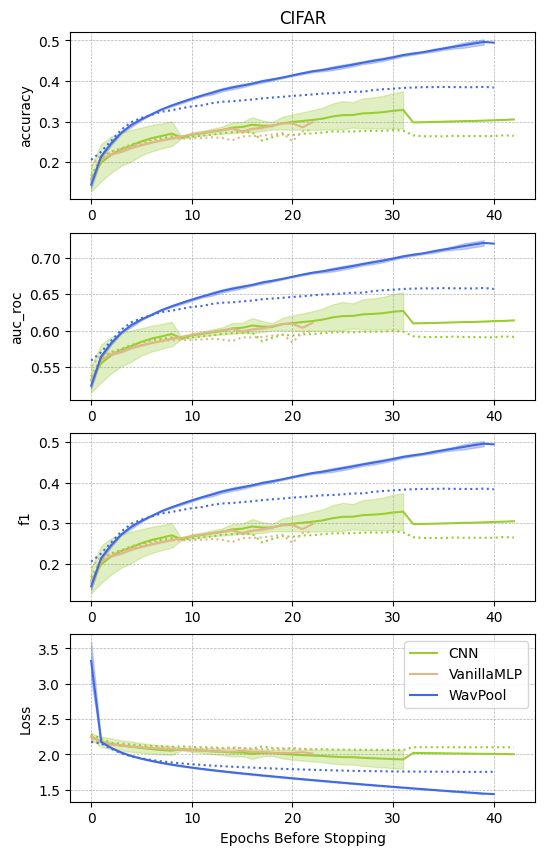

In [57]:
models = ["CNN", "VanillaMLP", "WavPool"]
colorway = ["yellowgreen", 'burlywood', "royalblue"]
markers = ["o", 's', '^']
datasets = ["FashionMNIST", "_MNIST", "CIFAR"]


for dataset in datasets: 
    n_subplots = len(extra_metrics) + 1
    fig, subplots = plt.subplots(nrows=n_subplots, ncols=1, figsize=(6, 2.5*n_subplots))

    for model, color, marker in zip(models, colorway, markers): 
        histories = read_history_json(model, dataset)
        label = model

        for metric_index, metrics in enumerate(extra_metrics):

            training = [history[f"train_{metrics.__name__}"] for history in histories]
            val = [history[f"val_{metrics.__name__}"] for history in histories]

            mean_training = pd.DataFrame(training).mean(axis=0)
            std_training = pd.DataFrame(training).std(axis=0)

            epochs = range(len(mean_training))

            mean_val = pd.DataFrame(val).mean(axis=0)

            subplots[metric_index].grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha=.6)

            subplots[metric_index].plot(epochs, mean_training, label=label, color=color)
            subplots[metric_index].fill_between(epochs,mean_training-std_training, mean_training+std_training ,alpha=0.3, color=color)
            subplots[metric_index].plot(epochs, mean_val, linestyle='dotted', color=color)
            subplots[metric_index].set_ylabel(metrics.__name__)


        training = [history[f"train_loss"] for history in histories]
        val = [history[f"val_loss"] for history in histories]

        mean_training = pd.DataFrame(training).mean(axis=0)
        std_training = pd.DataFrame(training).std(axis=0)
        mean_val = pd.DataFrame(val).mean(axis=0)

        epochs = range(len(mean_training))

        metric_index = -1

        subplots[metric_index].plot(epochs, mean_training, label=label, color=color)
        subplots[metric_index].fill_between(epochs,mean_training-std_training, mean_training+std_training ,alpha=0.3, color=color)
        subplots[metric_index].plot(epochs, mean_val, linestyle="dotted", color=color)
        subplots[metric_index].set_ylabel("Loss")
        subplots[metric_index].grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha=.6)

        subplots[0].set_title(dataset.strip("_"))
    plt.xlabel("Epochs Before Stopping")
    plt.legend()
    plt.show()



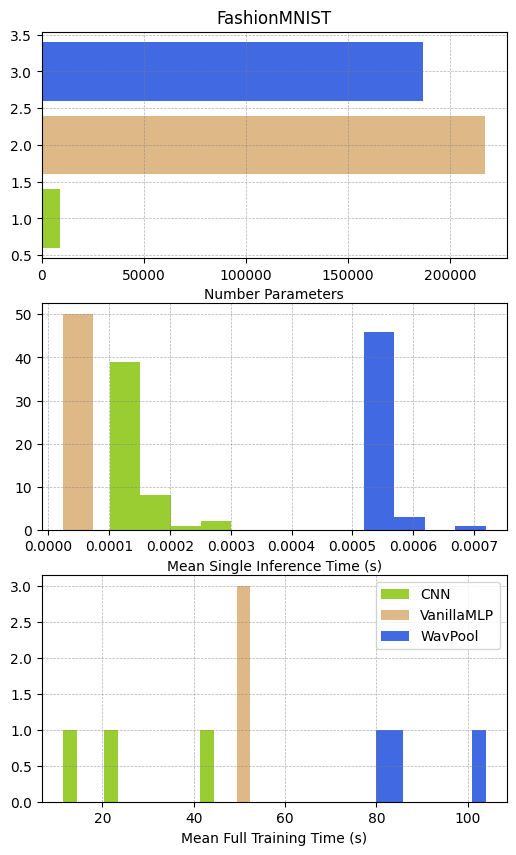

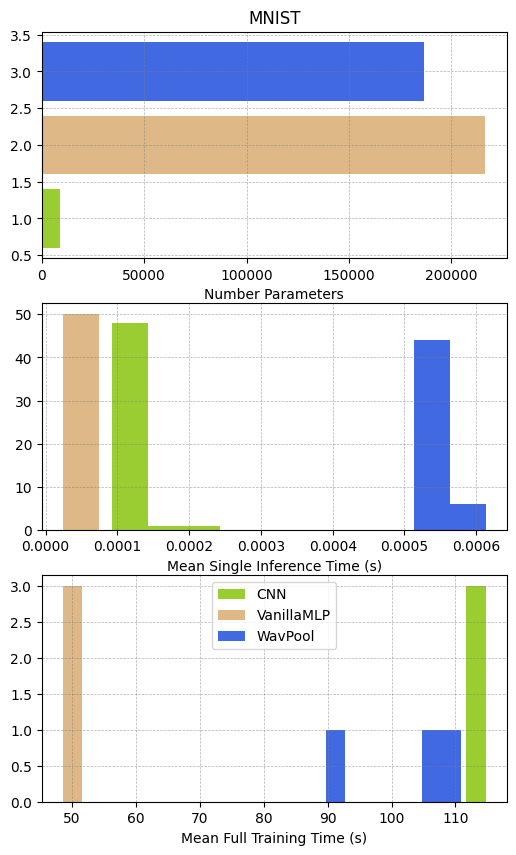

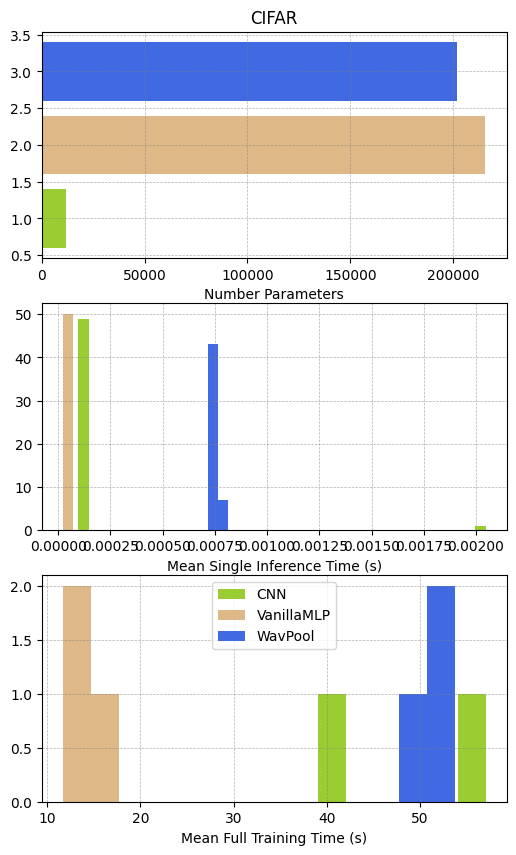

In [58]:
for dataset in datasets: 
    num_params = []
    inference_time = []
    training_time = []
    for i, model in enumerate(models): 
        params, inference, train = read_param_json(model, dataset)

        num_params.append(params)
        inference_time.append(inference)
        training_time.append(train)
    
    fig, subplots = plt.subplots(nrows=3, ncols=1, figsize=(6,10))

    bar_x = [i+1 for i in range(len(num_params))]
    widths = [.75 for _ in range(len(num_params))]

    subplots[0].barh(y=bar_x, width=num_params, color=colorway)
    subplots[0].set_xlabel("Number Parameters")
    subplots[0].grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha=.6)

    for model, color, inference, training in zip(models, colorway, inference_time, training_time):
        w = .00005
        subplots[1].hist(
            inference, 
            bins=np.arange(min(inference), max(inference)+w, w), 
            label=model, color=color)
        subplots[1].set_xlabel("Mean Single Inference Time (s)")
        subplots[1].grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha=.6)

        w = 3.0
        subplots[2].hist(
            training, 
            bins=np.arange(min(training), max(training)+w, w), 
            label=model, color=color)

        subplots[2].set_xlabel("Mean Full Training Time (s)")
        subplots[2].grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha=.6)

    subplots[0].set_title(dataset.strip('_'))
    plt.legend()
    plt.show()